In [2]:
pip install --upgrade tensorflow==2.0.0-rc1

     |████████████████████████████████| 86.3MB 35kB/s 
     |████████████████████████████████| 501kB 55.4MB/s 
     |████████████████████████████████| 4.3MB 55.1MB/s 
  Found existing installation: tensorflow 2.2.0rc1
    Uninstalling tensorflow-2.2.0rc1:
      Successfully uninstalled tensorflow-2.2.0rc1


datasets:-https://www.hackerearth.com/challenges/competitive/hackerearth-deep-learning-challenge-auto-tag-images-gala/machine-learning/auto-tag-images-of-the-gala-9e47fb31/


In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import cv2
from tqdm import tqdm
import matplotlib.pyplot as plt

In [0]:
train=pd.read_csv("/content/gdrive/My Drive/Dddd/train.csv")
test=pd.read_csv("/content/gdrive/My Drive/Dddd/test.csv")

In [7]:
train.head()

,Image,Class
0,image7042.jpg,Food
1,image3327.jpg,misc
2,image10335.jpg,Attire
3,image8019.jpg,Food
4,image2128.jpg,Attire


In [8]:
test.head()

,Image
0,image6245.jpg
1,image10409.jpg
2,image8692.jpg
3,image10517.jpg
4,image2580.jpg


In [0]:
Class_map={'Food':0,'Attire':1,'Decorationandsignage':2,'misc':3}
inverse_map={0:'Food',1:'Attire',2:'Decorationandsignage',3:'misc'}
train['Class']=train['Class'].map(Class_map)

In [10]:
train['Class']

0       0
1       3
2       1
3       0
4       1
       ..
5978    0
5979    1
5980    0
5981    0
5982    1
Name: Class, Length: 5983, dtype: int64

In [14]:
train_img=[]
train_label=[]
j=0
path="/content/gdrive/My Drive/Dddd/Train Images"
for i in tqdm(train['Image']):
    final_path=os.path.join(path,i)
    img=cv2.imread(final_path)
    img=cv2.resize(img,(150,150))
    img=img.astype('float32')
    train_img.append(img)
    train_label.append(train['Class'][j])
    j=j+1

100%|██████████| 5983/5983 [00:20<00:00, 298.97it/s]


In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
data=ImageDataGenerator(featurewise_center=False,
                        samplewise_center=False,
                        featurewise_std_normalization=False,
                        samplewise_std_normalization=False,
                        zca_whitening=False,
                         rotation_range=10,
                        zoom_range = 0.1,
                        width_shift_range=0.2,
                        height_shift_range=0.2,
                        horizontal_flip=True,
                        vertical_flip=False)
data.fit(train_img)

In [13]:
test_img=[]
path="/content/gdrive/My Drive/Dddd/Test Images"
for i in tqdm(test['Image']):
    final_path=os.path.join(path,i)
    img=cv2.imread(final_path)
    img=cv2.resize(img,(150,150))
    img=img.astype('float32')
    test_img.append(img)

100%|██████████| 3219/3219 [29:07<00:00,  1.84it/s]


In [15]:
train_img=np.array(train_img)
test_img=np.array(test_img)
train_label=np.array(train_label)
print(train_img.shape)
print(test_img.shape)
print(train_label.shape)

(5983, 150, 150, 3)
(3219, 150, 150, 3)
(5983,)


In [16]:
train_label

array([0, 3, 1, ..., 0, 0, 1])

In [0]:
train_img=train_img/255.0
test_img=test_img/255.0

In [0]:
test_img

In [19]:
train_img[1]

array([[[0.3882353 , 0.47058824, 0.4627451 ],
        [0.3647059 , 0.44705883, 0.43529412],
        [0.31764707, 0.4       , 0.39215687],
        ...,
        [0.16470589, 0.21568628, 0.19215687],
        [0.18039216, 0.23529412, 0.21176471],
        [0.19215687, 0.24705882, 0.22352941]],

       [[0.37254903, 0.4509804 , 0.44705883],
        [0.3529412 , 0.43529412, 0.42745098],
        [0.31764707, 0.4       , 0.39215687],
        ...,
        [0.1882353 , 0.23529412, 0.21568628],
        [0.19607843, 0.2509804 , 0.22745098],
        [0.2       , 0.25490198, 0.23137255]],

       [[0.30588236, 0.3882353 , 0.38039216],
        [0.30588236, 0.3882353 , 0.38039216],
        [0.3137255 , 0.39607844, 0.3882353 ],
        ...,
        [0.2784314 , 0.33333334, 0.30980393],
        [0.25490198, 0.30980393, 0.28627452],
        [0.23921569, 0.29803923, 0.27450982]],

       ...,

       [[0.35686275, 0.40784314, 0.44313726],
        [0.36078432, 0.40784314, 0.44313726],
        [0.36862746, 0

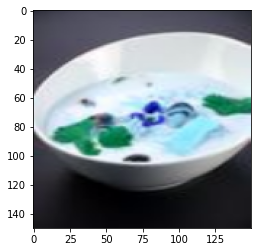

In [20]:
plt.imshow(train_img[0])
plt.show()

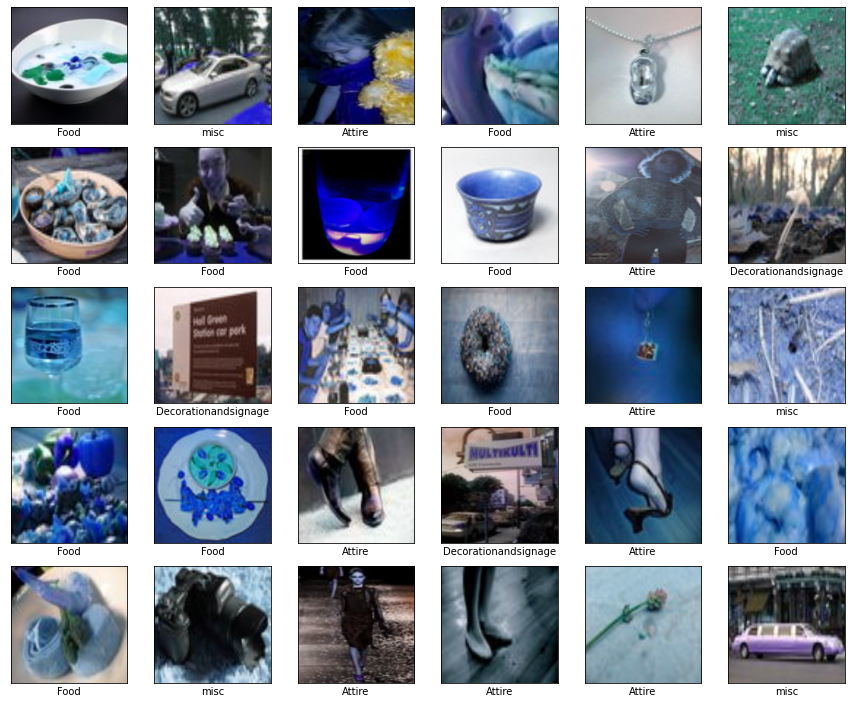

In [21]:
plt.figure(figsize=(15,15))
for i in range(30):
 plt.subplot(6,6,i+1)
 plt.xticks([])
 plt.yticks([])
 plt.grid(False)
 plt.imshow(train_img[i], cmap=plt.cm.binary)
 plt.xlabel(inverse_map[train_label[i]])
plt.show()

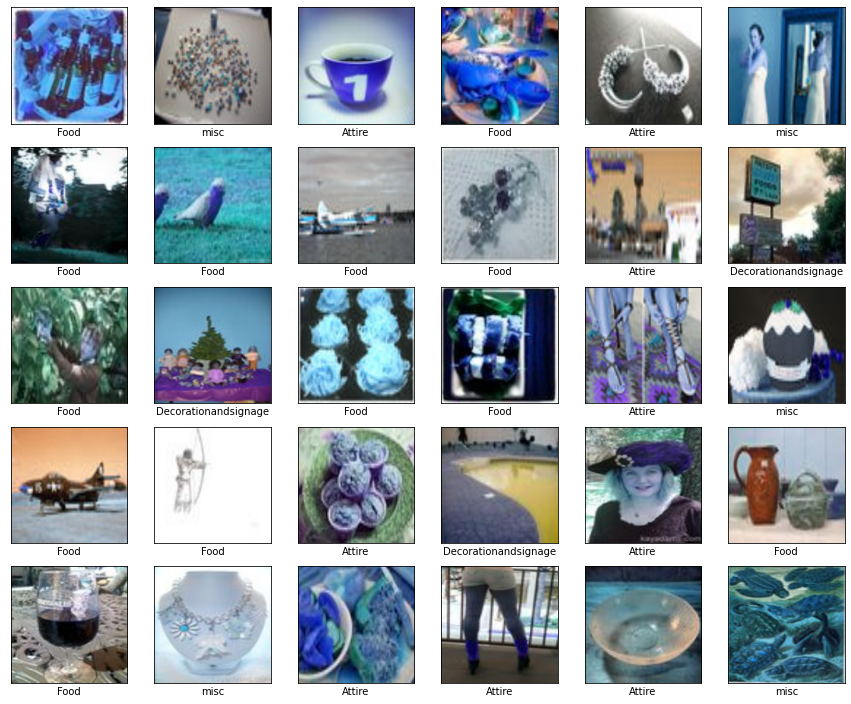

In [22]:
plt.figure(figsize=(15,15))
for i in range(30):
 plt.subplot(6,6,i+1)
 plt.xticks([])
 plt.yticks([])
 plt.grid(False)
 plt.imshow(test_img[i], cmap=plt.cm.binary)
 plt.xlabel(inverse_map[train_label[i]])
plt.show()

In [23]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.layers import Flatten,Dense,Dropout,BatchNormalization
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.utils import to_categorical
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.callbacks import ReduceLROnPlateau

Using TensorFlow backend.


In [24]:
base_model=VGG16(include_top=False, weights='imagenet',input_shape=(150,150,3), pooling='avg')

model=Sequential()
model.add(base_model)

model.add(Dense(256,activation='relu'))
model.add(Dense(4,activation='softmax'))

58892288/58889256 [==============================] - 6s 0us/step


In [0]:
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop

base_model.trainable=False

reduce_learning_rate = ReduceLROnPlateau(monitor='loss',
                                         factor=0.1,
                                         patience=2,
                                         cooldown=2,
                                         min_lr=0.00001,
                                         verbose=1)

In [0]:
callbacks = [reduce_learning_rate]
model.compile( optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit_generator(data.flow(train_img, to_categorical(train_label,4), batch_size=32),
                    epochs=10,callbacks=callbacks)

Epoch 1/10
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
187/187 [==============================] - 3216s 17s/step - loss: 1.0400 - accuracy: 0.5653
Epoch 2/10
187/187 [==============================] - 3154s 17s/step - loss: 0.8862 - accuracy: 0.6462
Epoch 3/10
 50/187 [=======>......................] - ETA: 39:01 - loss: 0.8576 - accuracy: 0.6662

In [0]:
labels = model.predict(test_img)
print(labels[:4])
label = [np.argmax(i) for i in labels]
class_label = [inverse_map[x] for x in label]
print(class_label[:3])
submission = pd.DataFrame({ 'Image': test.Image, 'Class': class_label })
submission.head(10)